In [1]:
import numpy as np
import pandas as pd
from deepneuralnet import *
import deepneuralnet_train as dnntrain

In [2]:
# Set up hyper parameters 
c = 1
layer_dims = [7, c] 
learning_rate = 0.001
keep_prob = 1.0
num_epochs = 100
minibatch_size = 64
print_summary = False
isBinary = c <= 2 
hyperparams = DNN.create_hyperparameter_bundle(layer_dims, learning_rate, num_epochs, keep_prob, minibatch_size)
print(hyperparams)

{'layer_dims': [7, 1], 'keep_prob': 1.0, 'learning_rate': 0.001, 'num_epochs': 100, 'minibatch_size': 64}


In [3]:
# Generate data
m = 333
n_x = 100
label = 'Survived'
x_data = np.random.rand(m, n_x)
y_test = None

if isBinary:
    y_test = np.random.randint(2, size=(1, m))[0]
else:
    y_test = np.random.randint(c, size=(1, m))[0]

df = pd.DataFrame(x_data)
df[label] = y_test
df = df.astype('float32')
classification = len(set(y_test))
print(classification)

2


train_x.shape: (233, 100)
train_y.shape: (233, 1)
dev_x.shape: (100, 100)
dev_y.shape: (100, 1)
Binary classification neural network with hyperparameters:
layer_dims: [7, 1] dropoutKeepProb: 1.0 learning_rate: 0.001 num_epochs: 100 minibatch_size: 64
Init Params
W shape: (100, 7)
b shape: (1, 7)
W shape: (7, 1)
b shape: (1, 1)
forwardProp: X.shape -- (?, 100)
forwardProp: Z.shape -- (?, 7)
forwardProp: Z.shape -- (?, 1)
forwardProp: X.shape -- (?, 100)
forwardProp: Z.shape -- (?, 7)
forwardProp: Z.shape -- (?, 1)
(?, 1)
(?, 1)
Training underway...
Cost after epoch 0: 1.156883
Cost after epoch 20: 0.832120
Cost after epoch 40: 0.651852
Cost after epoch 60: 0.507797
Cost after epoch 80: 0.422751
prediction_values_test.shape: (100,)
Y_test.shape: (100,)


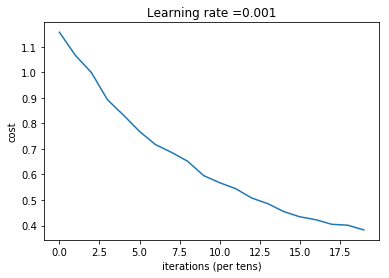

train_accuracy : 0.497854
test_accuracy : 0.53
precision : 0.540816326531
recall : 0.963636363636
f1score : 0.692810457516
Done training!



In [4]:
# Example of using dnn.train_with_hyperparameter_bundle
nn = DNN(hyperparams)
model = nn.split_data_and_train(df, label, split_percent=0.7)
# parameters = model[dnn.KEY_PARAMETERS]